Project 2 FindDefault (Prediction of Credit Card fraud) Problem Statement: A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We have to build a classification model to predict whether a transaction is fraudulent or not.

1.IMPORTING LIBRARIES

In [467]:
import pandas as pd
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report


2.DATA PREPARATION

In [470]:
data = pd.read_csv("creditcard (1).csv")

In [471]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [472]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [473]:
pd.options.display.max_columns = None

In [478]:
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))

Number of rows : 284807
Number of columns : 31


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that all the values are numerical and of them are float except the 'Class' column which is the target column is integer.

CHECKING FOR NULL VALUES

In [484]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we can see,There are no null values in the dataset and hence no need to impute them

In [487]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


THE ABOVE STATS TELLS US THE FOLLLOWING: 1.Count of fraud transactions is 492 where as that of normal transactions are 284315. 2.The max amount transfered fraud is 2125.87 and most of the amount (75%) are around 5 dollars. 3.The maximum amount transfered fraud is far less than the amount transfered through genuine transactions.

In [491]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [493]:
#data = data.drop(['Time'], axis = 1)

Checking for duplicate rows and dropping if any

In [496]:
data.duplicated().any()

True

In [497]:
data = data.drop_duplicates()

In [498]:
data['Class'].unique()

array([0, 1], dtype=int64)

Class which is the target column as two values-->0 and 1.
Reffering to the code below there are 283253 0s and 473 1s
Which clearly states that the data is highly imbalanced .
One more thing which we can infer here is that 0 represents normal transactions and 1 represents fraud transactions since there cant be a majority of fraud cases as we assume.

In [501]:
data.shape

(283726, 31)

In [502]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [503]:
#Checking and changing the datatype of 'Time' column

In [504]:
from datetime import datetime, date, time
pd.to_datetime(data['Time'])

0        1970-01-01 00:00:00.000000000
1        1970-01-01 00:00:00.000000000
2        1970-01-01 00:00:00.000000001
3        1970-01-01 00:00:00.000000001
4        1970-01-01 00:00:00.000000002
                      ...             
284802   1970-01-01 00:00:00.000172786
284803   1970-01-01 00:00:00.000172787
284804   1970-01-01 00:00:00.000172788
284805   1970-01-01 00:00:00.000172788
284806   1970-01-01 00:00:00.000172792
Name: Time, Length: 283726, dtype: datetime64[ns]

EXPLORATORY DATA ANALYSIS

In [512]:
import matplotlib.pyplot as plt

C:\Users\Akshara Anil\AppData\Local\Temp\ipykernel_8344\4167097590.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_of_class=pd.value_counts(data['Class'],sort = True)


Text(0, 0.5, 'Distribution')

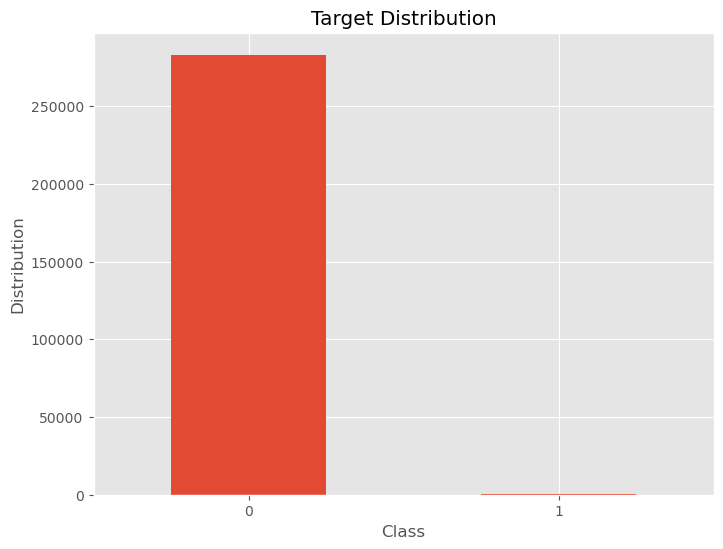

In [514]:
#To know the distribution of values 0 and 1 in 'Class' column
count_of_class=pd.value_counts(data['Class'],sort = True)
plt.figure(figsize=(8,6))
count_of_class.plot(kind = 'bar',rot = 0)
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Distribution')

Clearly the target 'Class' is highly imbalanced with class 0 heavily distributed.This suggests that 1 indicates fraudulent data and 0 otherwise.More that 250000 transactions out of 284807 are not fraud and only a tiny fraction of the transations are fraud.

<Axes: >

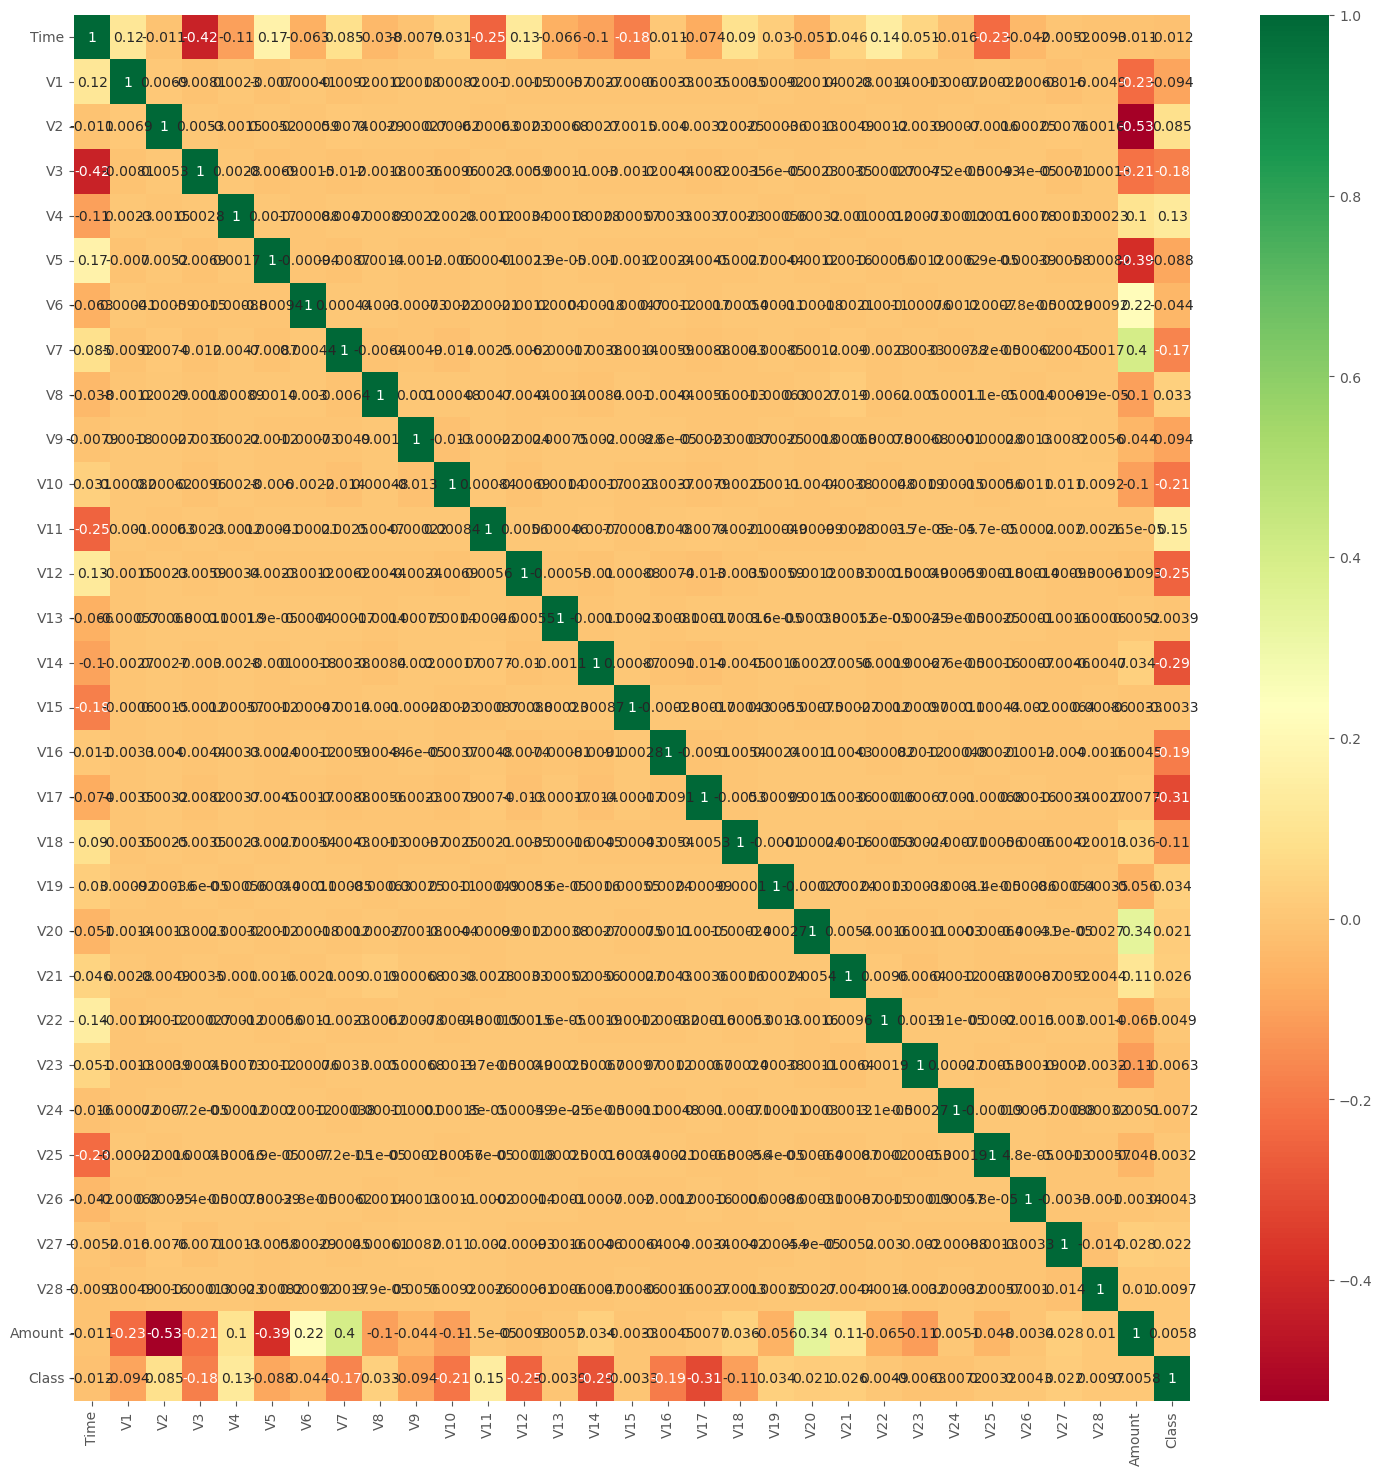

In [517]:
#Correction
import seaborn as sns
#Correlation of each feature in the data
corrmat = data.corr()
corr_feature_order = corrmat.index
plt.figure(figsize=(18,18))
sns.heatmap(data[corr_feature_order].corr(),annot=True,cmap='RdYlGn')

From the above Correlation matrix we can see that V17 has high correlation with the target column 'Amount' 
Other columns which has some sort of effects on "Class" column is v14.But one of challenges in working with this dataset is that all the values from V1 to V27 have already undergone PCA due to their sensitivity.These values are highly sensitive and confidential and their we are unaware of what these features mean and reprensent.The only independent feature known to us is 'Amount' and 'Time'.Both these features are given in its actual forms.Therefore finding relationships between these columns aren't meaningful.

In [519]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Amount vs V17')

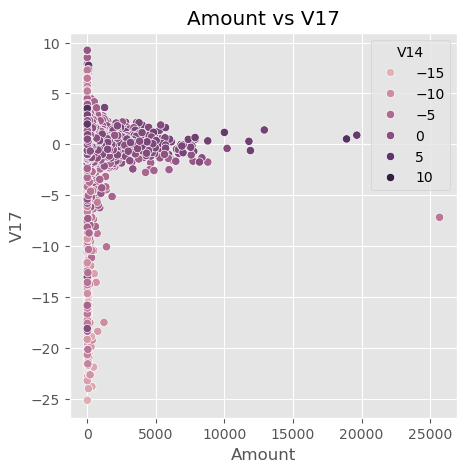

In [520]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data=data, x="Amount", y="V17", hue="V14")
plt.title("Amount vs V17")

Text(0.5, 1.0, 'Distribution of V17')

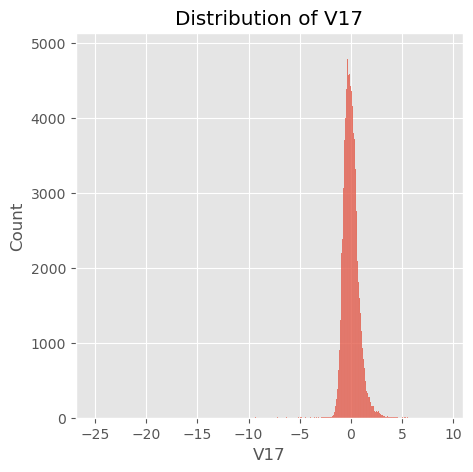

In [521]:
#Distribution of V17
plt.figure(figsize = (5, 5))
sns.histplot(data['V17'])
plt.title("Distribution of V17")

In [522]:
#Parplot between 'Time','Amount' ,'v17' and 'Class'(Target)

<Figure size 1500x200 with 0 Axes>

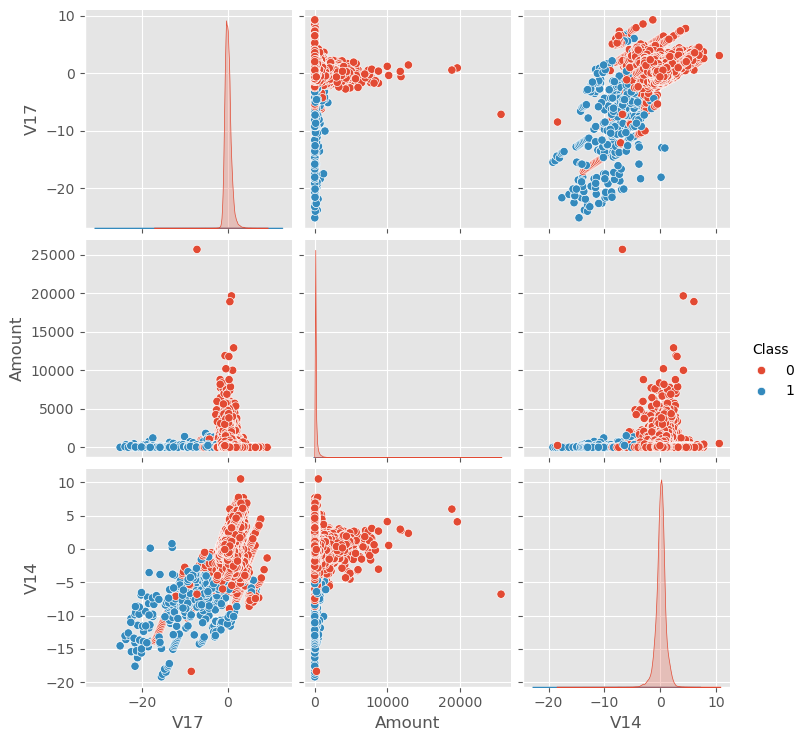

In [523]:
plt.figure(figsize=(15,2))
sns.pairplot(data[['V17',  'Amount', 'V14','Class']],hue='Class')

From the above pairplot,V14 and V17 seems to have a positive correlation each other.

In [525]:

plt.style.use('ggplot')

In [526]:
X = data.drop('Class',axis = 1)
y = data['Class']

In [527]:

#Transforming the Amount column too to standard scelar
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [528]:
from sklearn.model_selection import train_test_split

In [529]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [532]:
classifier = {
      "Logistic Regression":LogisticRegression(),
      "Decision Tree Classifier":DecisionTreeClassifier()
    
}

for name,clf in classifier.items():
    print(f"\n==========={name}=========")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\nAccuracy : {accuracy_score(y_test,y_pred)}")
    print(f"\nPrecision : {precision_score(y_test,y_pred)}")
    print(f"\nRecall : {recall_score(y_test,y_pred)}")
    print(f"\nF1 score : {f1_score(y_test,y_pred)}")
    print(f"\n Classification_Report: {classification_report(y_test,y_pred)}")


===========Logistic Regression=========


C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy : 0.999048391076023

Precision : 0.75

Recall : 0.6

F1 score : 0.6666666666666666

 Classification_Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.75      0.60      0.67        90

    accuracy                           1.00     56746
   macro avg       0.87      0.80      0.83     56746
weighted avg       1.00      1.00      1.00     56746


===========Decision Tree Classifier=========

Accuracy : 0.9990307686885419

Precision : 0.6804123711340206

Recall : 0.7333333333333333

F1 score : 0.7058823529411765

 Classification_Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.68      0.73      0.71        90

    accuracy                           1.00     56746
   macro avg       0.84      0.87      0.85     56746
weighted avg       1.00      1.00      1.00     56746



We have taken the dataset as it is and have got the above results.
Lets try undersampling to check if it increases the matrics score since the dataset is heavily imbalanced.
This can lead to a great data loss but I'm not trying uppersampling since the data can get errorneous.

In [534]:
#undersampling
normal = data[data['Class'] ==0]
fraud = data[data['Class'] ==1]

In [535]:
normal.shape

(283253, 31)

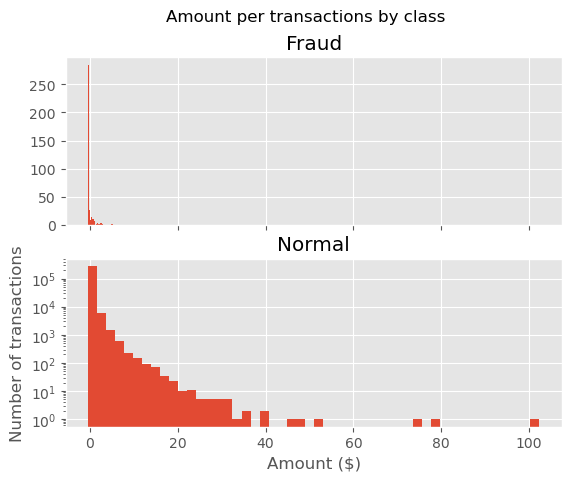

In [536]:
#Plotting the amount tranfered per class(distribution)
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transactions by class")
bins = 50
ax1.hist(fraud.Amount, bins= bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins= bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.show()

In [537]:
fraud.shape

(473, 31)

In [538]:
normal_sample = normal.sample(n=473)

In [539]:
print(type(normal_sample))

<class 'pandas.core.frame.DataFrame'>


In [540]:
print(type(normal_sample))

<class 'pandas.core.frame.DataFrame'>


In [541]:
print(type(fraud))

<class 'pandas.core.frame.DataFrame'>


In [542]:
normal_sample = pd.DataFrame(normal_sample)

In [543]:
fraud = pd.DataFrame(fraud)
print(type(fraud))

<class 'pandas.core.frame.DataFrame'>


In [544]:
print(type(normal_sample))

<class 'pandas.core.frame.DataFrame'>


In [545]:
undersampled = pd.concat([normal_sample,fraud], ignore_index = True)

In [546]:
undersampled.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,22621.0,1.289861,-0.227338,0.478749,-1.027695,-0.822950,-1.119759,-0.222064,-0.295601,2.911040,-1.585140,0.577922,-1.457576,1.824115,1.341221,-0.206885,-0.984987,0.969929,-0.317201,0.959947,-0.117925,-0.424683,-0.703672,0.030290,0.374459,0.460164,-0.230337,-0.007996,0.010875,-0.313870,0
1,59486.0,1.211290,0.023035,0.958579,1.137987,-0.482108,0.297862,-0.503219,0.081813,0.786418,-0.232279,-1.356138,0.778099,1.255040,-0.623489,0.120954,0.271542,-0.613767,0.078515,0.096841,-0.037258,-0.104689,-0.038947,-0.121948,-0.428296,0.562654,-0.360290,0.078377,0.032125,-0.313431,0
2,167670.0,-0.848282,-0.295759,0.550516,-1.237562,0.078511,0.266576,1.964597,-0.150155,0.168635,-1.060671,0.399487,0.019688,-1.604593,0.238479,-1.436620,-0.146197,-0.638496,0.116952,-0.117805,0.418859,0.058833,-0.147830,0.439993,0.644942,0.018854,-0.278173,-0.184351,-0.075995,0.770799,0
3,171170.0,-0.034617,0.603323,0.674040,1.163115,0.374111,-0.626015,0.585235,-0.187161,-0.589995,0.057356,-0.766383,-0.219070,-0.176783,0.427364,1.106054,-1.435533,0.879514,-0.425448,2.883228,0.300372,-0.117387,-0.218579,0.036860,0.028187,-0.662369,0.692599,0.141510,0.171831,-0.274253,0
4,147162.0,2.002812,0.168878,-1.858006,0.366716,0.431622,-1.013137,0.238620,-0.271569,0.247034,-0.372187,1.207470,0.979839,0.626586,-0.782741,0.160838,0.496631,0.072373,1.067033,-0.048074,-0.104063,0.238798,0.824692,-0.097360,-0.389574,0.281845,-0.105133,-0.004325,-0.037794,-0.269740,0
5,86483.0,1.384761,-2.027566,-3.456816,-1.452092,0.851178,0.690895,0.706943,-0.161025,-1.124495,0.561756,0.834999,0.699301,0.331497,0.955764,0.008498,-2.877513,0.604353,0.024771,-0.945250,0.201945,0.220524,0.418627,-0.431554,-0.819521,0.188667,1.305693,-0.175498,-0.046400,1.323996,0
6,146336.0,-0.584877,0.746503,0.470728,-0.552981,-0.016702,0.057236,-0.502606,0.770150,0.596937,-1.232693,-1.321311,-0.470311,-0.251280,-1.280902,0.637388,1.298563,0.217263,0.913040,-0.619374,-0.010351,0.018533,0.028580,0.026618,0.167311,-0.547326,0.344038,0.198896,0.066883,-0.326530,0
7,68827.0,1.249709,-0.571854,0.519364,-0.619909,-1.138835,-0.812197,-0.436081,-0.156383,-1.247544,0.799909,1.550419,1.062192,1.051729,0.136255,0.167564,-1.074686,-0.296628,1.189804,-0.567099,-0.325885,-0.386728,-0.747078,0.107191,0.567271,0.050416,0.866975,-0.061329,0.012489,-0.146737,0
8,83079.0,-0.639485,-0.356416,2.107022,-2.666819,-1.124525,-0.286607,-0.602840,0.237948,-2.216523,1.041852,0.486677,-1.274472,-0.752283,-0.271200,-0.281408,0.337231,-0.147090,1.140473,-0.544500,-0.208732,-0.038997,0.218313,-0.318051,-0.039150,0.394888,-0.163207,0.297236,0.114168,-0.305403,0
9,68125.0,1.260651,-0.500920,0.753681,-0.572198,-1.139538,-0.851317,-0.498981,-0.157737,-0.971244,0.520125,0.689219,0.254781,1.075769,-0.284177,0.921817,0.745520,0.633826,-2.319388,0.031498,0.152505,-0.000477,-0.119538,0.188199,0.608958,0.107049,-0.491312,0.027479,0.032711,-0.181601,0


In [547]:
undersampled.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [549]:
undersampled.shape

(946, 31)

In [550]:
undersampled['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [565]:
X = undersampled.drop('Class',axis = 1)
y = undersampled['Class']

In [567]:
X.shape


(946, 30)

In [569]:
y.shape

(946,)

In [571]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [573]:
classifier = {
      "Logistic Regression":LogisticRegression(),
      "Decision Tree Classifier":DecisionTreeClassifier()
    
}

for name,clf in classifier.items():
    print(f"\n==========={name}=========")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\nAccuracy : {accuracy_score(y_test,y_pred)}")
    print(f"\nPrecision : {precision_score(y_test,y_pred)}")
    print(f"\nRecall : {recall_score(y_test,y_pred)}")
    print(f"\nF1 score : {f1_score(y_test,y_pred)}")
    print(f"\nClassification Report : {classification_report(y_test,y_pred)}")


===========Logistic Regression=========

Accuracy : 0.9368421052631579

Precision : 0.96875

Recall : 0.9117647058823529

F1 score : 0.9393939393939394

Classification Report :               precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.97      0.91      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190


===========Decision Tree Classifier=========

Accuracy : 0.9

Precision : 0.8952380952380953

Recall : 0.9215686274509803

F1 score : 0.9082125603864735

Classification Report :               precision    recall  f1-score   support

           0       0.91      0.88      0.89        88
           1       0.90      0.92      0.91       102

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90 

C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Here,we can see that both the algorithms "Logistic Regression" and "Decision Tree Classifier"  are working well when undersampled.But to create the model for credit card fraud detection I am using Decision Tree Classifier since trees work better with highly inbalanced data.

In [600]:
model1 = DecisionTreeClassifier()
model1.fit(X,y)

DecisionTreeClassifier()

In [602]:
model2 = LogisticRegression()
model2.fit(X,y)

C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [608]:
model1 = model1.predict(X_test)
model2 = model2.predict(X_test)


In [604]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [610]:
confusion_matrix(y_test,model1)

array([[ 88,   0],
       [  0, 102]], dtype=int64)

In [612]:
confusion_matrix(y_test,model2)

array([[86,  2],
       [ 6, 96]], dtype=int64)

In [616]:
import pickle
with open('classifier.pkl','wb') as file:
  pickle.dump(model, file)